Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

N - ratio of Nitrogen content in soil

P - ratio of Phosphorous content in soil

K - ratio of Potassium content in soil

temperature - temperature in degree Celsius

humidity - relative humidity in %

ph - ph value of the soil

rainfall - rainfall in mm

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("E:\Datasets\Crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count Plot of Crop label'}, xlabel='label', ylabel='count'>

findfont: Font family ['b'] not found. Falling back to DejaVu Sans.


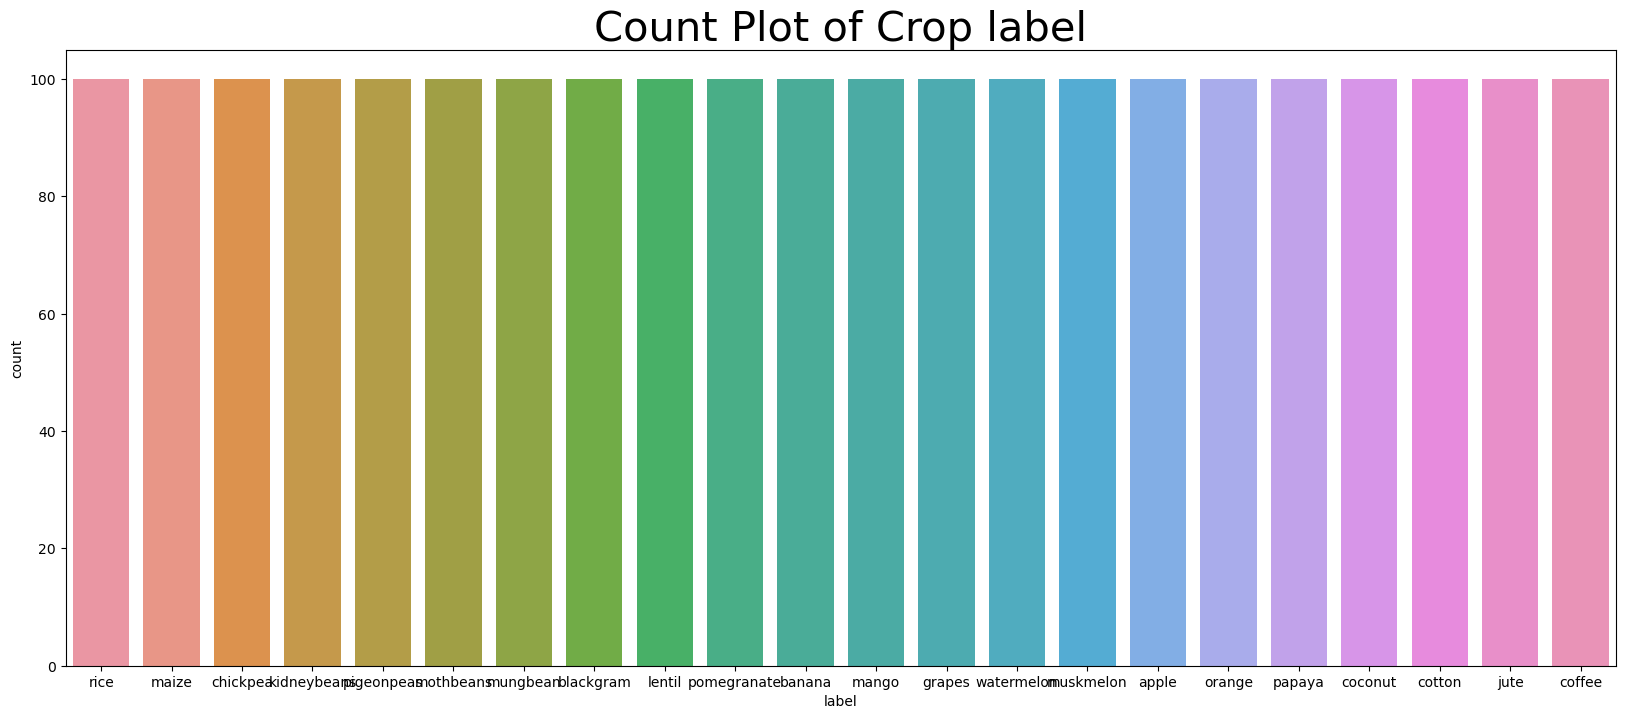

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.title("Count Plot of Crop label",size=30,font='b')
sns.countplot("label",data=df)

#### Data is balanced

In [41]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [46]:
xsample=x.iloc[[510,330,143,256,115],:]
ysample=y.iloc[[510,330,143,256,115]]
print(xsample,ysample)

      N   P   K  temperature   humidity        ph    rainfall
510  40  49  17    31.022159  45.892395  6.687275   53.567833
330  17  77  23    24.513248  20.815276  5.670063   64.194979
143  89  60  17    25.375488  57.210256  5.983953  101.700431
256  37  66  85    20.931753  18.912954  6.456148   78.069108
115  63  58  22    18.254054  55.282204  6.204748   63.723582 510      mothbeans
330    kidneybeans
143          maize
256       chickpea
115          maize
Name: label, dtype: object


In [27]:
from collections import Counter
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [28]:
print(Counter(y_train))

Counter({'mungbean': 87, 'watermelon': 87, 'pigeonpeas': 85, 'muskmelon': 85, 'rice': 83, 'apple': 82, 'mothbeans': 81, 'mango': 80, 'maize': 80, 'kidneybeans': 80, 'orange': 80, 'grapes': 80, 'banana': 79, 'papaya': 79, 'lentil': 79, 'blackgram': 78, 'coffee': 77, 'jute': 77, 'pomegranate': 76, 'coconut': 76, 'chickpea': 75, 'cotton': 74})


In [29]:
print(Counter(y_test))

Counter({'cotton': 26, 'chickpea': 25, 'pomegranate': 24, 'coconut': 24, 'jute': 23, 'coffee': 23, 'blackgram': 22, 'papaya': 21, 'banana': 21, 'lentil': 21, 'maize': 20, 'kidneybeans': 20, 'mango': 20, 'grapes': 20, 'orange': 20, 'mothbeans': 19, 'apple': 18, 'rice': 17, 'muskmelon': 15, 'pigeonpeas': 15, 'mungbean': 13, 'watermelon': 13})


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold


In [49]:
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x_train,y_train)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_pred=l1.predict(x_test)
print(y_pred)

['papaya' 'papaya' 'pomegranate' 'cotton' 'jute' 'maize' 'muskmelon'
 'rice' 'mungbean' 'kidneybeans' 'banana' 'pomegranate' 'papaya' 'mango'
 'coffee' 'blackgram' 'pigeonpeas' 'cotton' 'papaya' 'lentil' 'coconut'
 'cotton' 'mango' 'mango' 'mungbean' 'cotton' 'apple' 'papaya' 'blackgram'
 'mothbeans' 'cotton' 'coffee' 'pigeonpeas' 'mango' 'banana' 'muskmelon'
 'cotton' 'papaya' 'watermelon' 'kidneybeans' 'jute' 'blackgram' 'maize'
 'papaya' 'apple' 'blackgram' 'maize' 'maize' 'mothbeans' 'pigeonpeas'
 'grapes' 'kidneybeans' 'mothbeans' 'kidneybeans' 'mothbeans' 'orange'
 'jute' 'orange' 'kidneybeans' 'banana' 'cotton' 'blackgram' 'maize'
 'grapes' 'lentil' 'pomegranate' 'kidneybeans' 'grapes' 'orange'
 'kidneybeans' 'pomegranate' 'grapes' 'jute' 'watermelon' 'blackgram'
 'kidneybeans' 'jute' 'coffee' 'mungbean' 'grapes' 'cotton' 'apple'
 'kidneybeans' 'apple' 'muskmelon' 'pomegranate' 'papaya' 'coffee'
 'blackgram' 'cotton' 'orange' 'jute' 'cotton' 'pomegranate' 'mango'
 'apple' 'maize

In [51]:
l1.predict(xsample)

array(['mothbeans', 'kidneybeans', 'maize', 'chickpea', 'maize'],
      dtype=object)

In [54]:
ysample

510      mothbeans
330    kidneybeans
143          maize
256       chickpea
115          maize
Name: label, dtype: object

In [56]:
print("Train Accuracy: ",l1.score(x_train,y_train))
print("Test Accuracy: ",l1.score(x_test,y_test))

Train Accuracy:  0.9676136363636364
Test Accuracy:  0.9613636363636363


In [57]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier(n_neighbors=10,metric="minkowski",p=1)
k.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [58]:
k.predict(xsample)

array(['mothbeans', 'kidneybeans', 'maize', 'chickpea', 'maize'],
      dtype=object)

In [59]:
print("Train Accuracy: ",k.score(x_train,y_train))
print("Test Accuracy: ",k.score(x_test,y_test))

Train Accuracy:  0.9835227272727273
Test Accuracy:  0.9818181818181818
